### Arjun Mehta

#### Prodigy Infotech's Machine Learning Internship's Second Project

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

In [1]:
import pandas as pd                    # Importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
dataset=pd.read_csv('Mall_Customers.csv') # Loading into DataFrame
print("Data set's first few lines are= ")
print(dataset.head(10))

Data set's first few lines are= 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [6]:
data=dataset.iloc[:,[3,4]].values     #Select features for clustering

In [7]:
wcss=[]                             #Finding no. of clusters using Elbow Method
for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_model.fit(data)
    wcss.append(kmeans_model.inertia_)

In [13]:
kmeans_model=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)   #Application of K-Means with perfect number of clusters
clusters=kmeans_model.fit_predict(data)

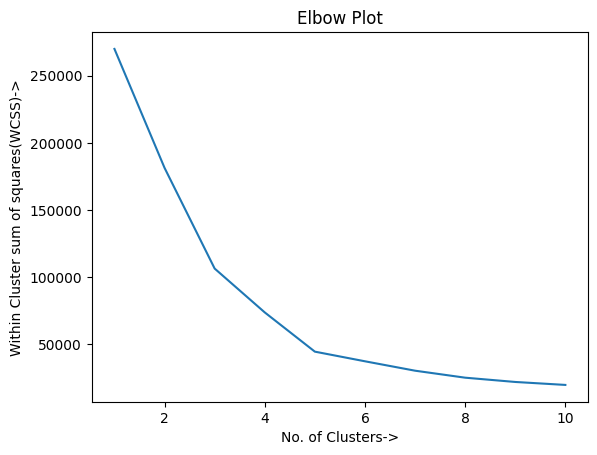

In [12]:
plt.plot(range(1,11),wcss)     #Elbow Plot
plt.title('Elbow Plot')
plt.xlabel('No. of Clusters->')
plt.ylabel('Within Cluster sum of squares(WCSS)->')
plt.show()

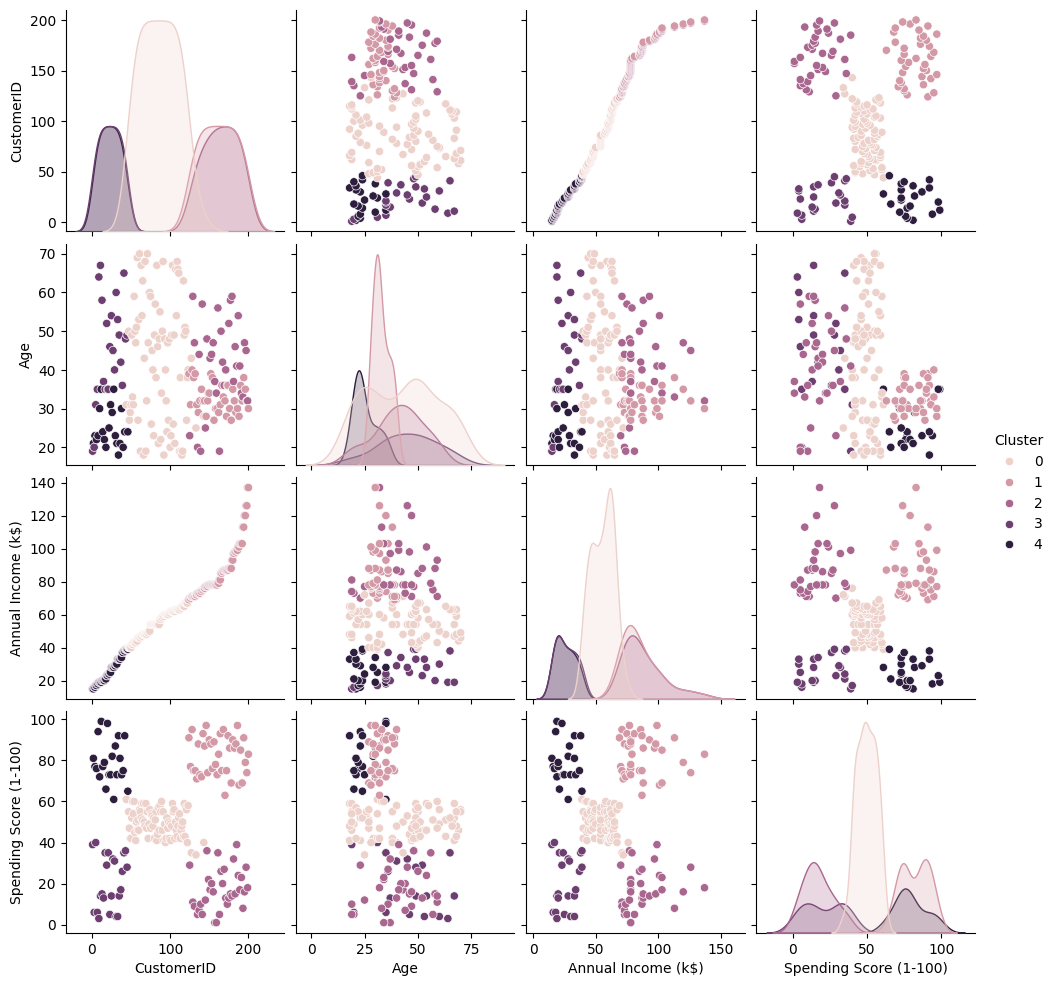

In [15]:
dataset['Cluster']=clusters              # Pairplot of data in each feature with the clusters
sns.pairplot(dataset,hue='Cluster') 

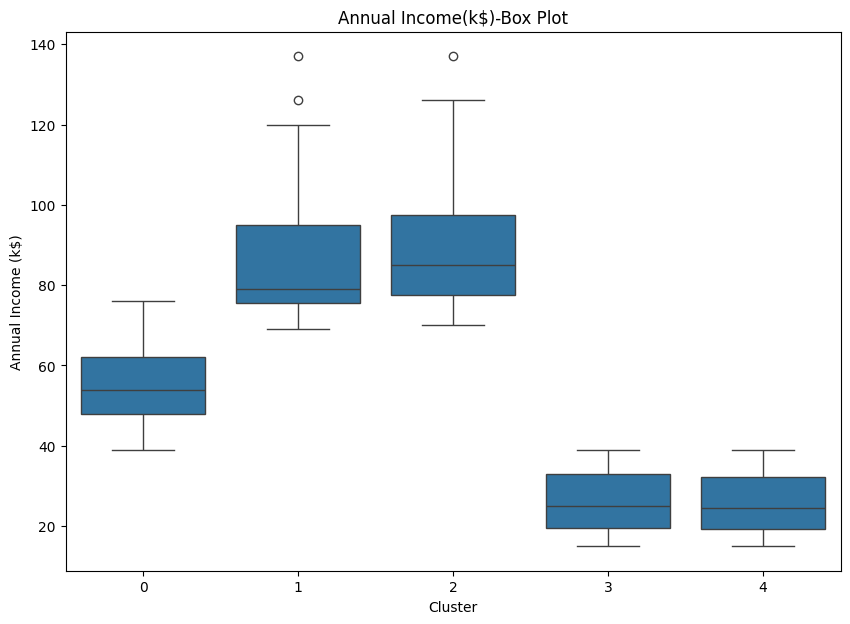

In [23]:
plt.figure(figsize=(10,7))                       #Annual Income Box Plot
plt.title("Annual Income(k$)-Box Plot")
sns.boxplot(y='Annual Income (k$)',x='Cluster',data=dataset)
plt.show()

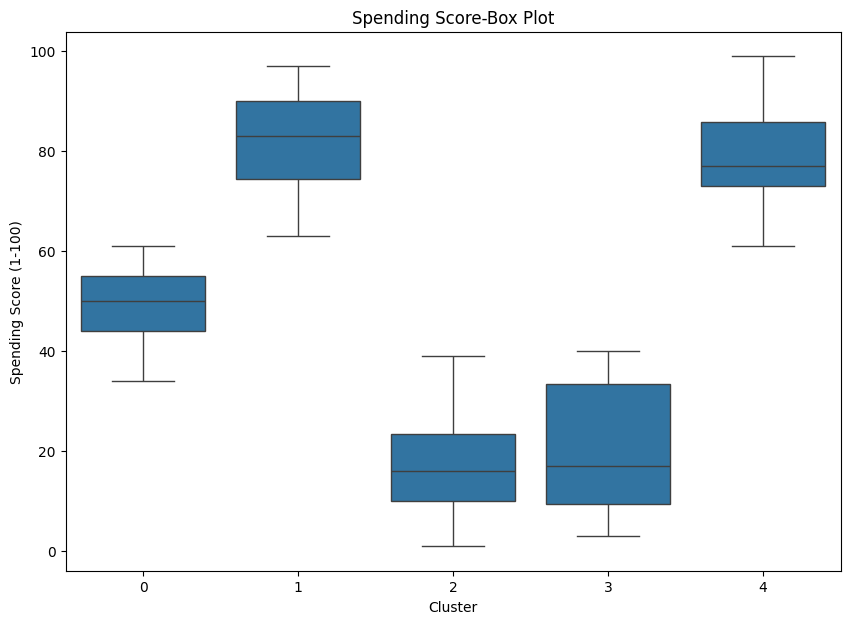

In [24]:
plt.figure(figsize=(10,7))            # Spending Score Box Plot
plt.title("Spending Score-Box Plot")
sns.boxplot(y='Spending Score (1-100)',x='Cluster',data=dataset)
plt.show()

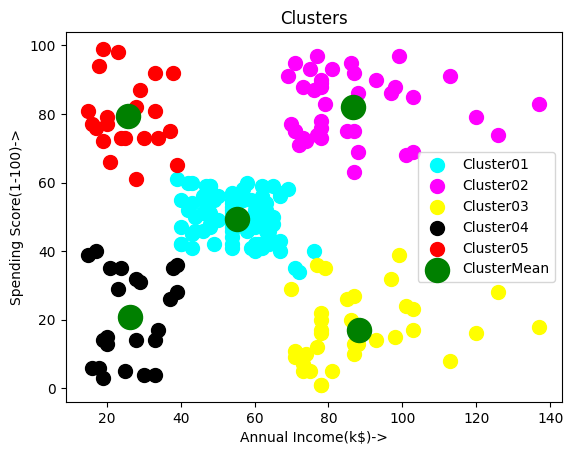

In [26]:
#Cluster Visualisation
colours =['cyan', 'magenta', 'yellow', 'black', 'red']
labels = ['Cluster01', 'Cluster02', 'Cluster03', 'Cluster04', 'Cluster05']

for i in range(5):
    plt.scatter(data[clusters == i, 0], data[clusters == i, 1], s=100, c=colours[i], label=labels[i])
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='green', label='ClusterMean')

plt.title('Clusters')
plt.xlabel('Annual Income(k$)->')
plt.ylabel('Spending Score(1-100)->')
plt.legend()
plt.show()